In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../')

from glyphs.core import GlyphPath,GridExplorer
from glyphs.visualization import render_multipath_fill, render_skeleton, render_path_debug,render_multipath_lines
import numpy as np
import pandas as pd



# Recreating glyphs


<img src="example_path.png" width="500"/>


# building skeletons

Order of operations :
1. Pick a starting location on grid
2. Recursively connect to neighbors
3. abandon recursion if 
        --> we run into a point we've already been to that ISN'T the starting point
        --> we paint ourselves into a corner
4. Sucessfull skeleton cycle is achieved when it reconnects with starting location
5. We dedup skeletons that hit all the same locations (regardless of ordering)
 

In [2]:
size = 5
explorer = GridExplorer(size)
explorer.explore_closed_cylces()
explorer.save_cycles_to_csv(save_location='grid_size5_skeletons.csv')

100%|█████████████████████████████████████████████████████████████████████████████████████████| 25/25 [03:18<00:00,  7.93s/it]
2023-05-27 17:22:35,809 glyphs.core INFO:total number of unique skeletons prior to dedup 326624
2023-05-27 17:22:36,943 glyphs.core INFO:total number of unique skeletons post dedup 6852


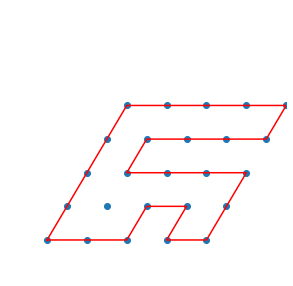

In [27]:
path_idx = 5

fig = render_skeleton(explorer.all_paths[path_idx])
fig.savefig('backbone.png')

# Adding hexagon kernals

In [18]:
#adding rotating kernals
rotations = np.random.choice(2, size ** 2).reshape((size, size))
rotations

array([[0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 1, 0],
       [1, 1, 0, 0, 1]])

In [19]:
glyph_path = GlyphPath(explorer.all_paths[path_idx], rotations)
glyph_path.run_all()
result_series = glyph_path.return_series()
result_series

is_crossing                                                False
area                                                   10.680924
concavity                                               0.427237
distance                                                    24.0
solidity                                                0.445039
all_points     [(0.5, 0.2887), (0.3333, 0.5774), (0.1667, 0.8...
grid           [[1.0, 2.0, 3.0, 4.0, 5.0], [24.0, 0.0, 14.0, ...
rotations      [[0, 1, 1, 0, 0], [1, 0, 1, 0, 0], [0, 0, 0, 1...
dtype: object

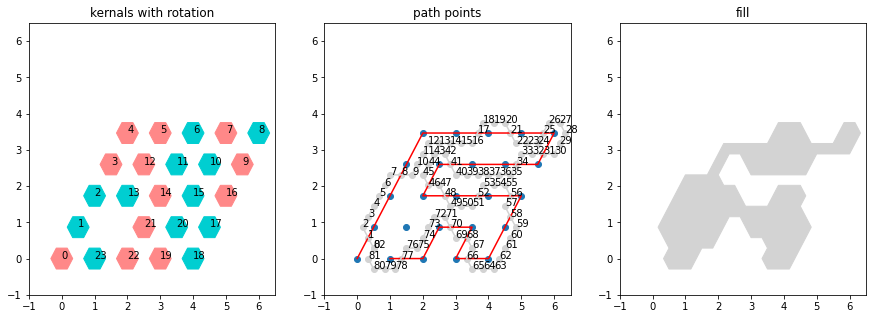

In [29]:
fig = render_path_debug(glyph_path)
fig.savefig('fill_in.png',bbox_inches='tight')

# Creating multiple glyphs



num_unique_cycles * 2**(length_of_cylces)


In [7]:
from tqdm import tqdm

successful_cylces = []
glyph_path_list = []

index = 0
target_value = 5000
with tqdm(total=target_value) as pbar:
    
    while len(successful_cylces) < target_value:
        index = (index + 1) % len(explorer.all_paths)

        rotations = np.random.choice(2, size ** 2).reshape((size, size))
        glyph_path = GlyphPath(explorer.all_paths[index], rotations)
        glyph_path.run_all()
        result_series = glyph_path.return_series()
        if not result_series['is_crossing']:
            successful_cylces.append(result_series)
            glyph_path_list.append(glyph_path)
            pbar.update(1)
result_df = pd.DataFrame(successful_cylces)
result_df['glyph_objects'] = glyph_path_list

100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [02:02<00:00, 40.91it/s]


In [8]:
# compare by solidity 

lowest solidity
highest solidity


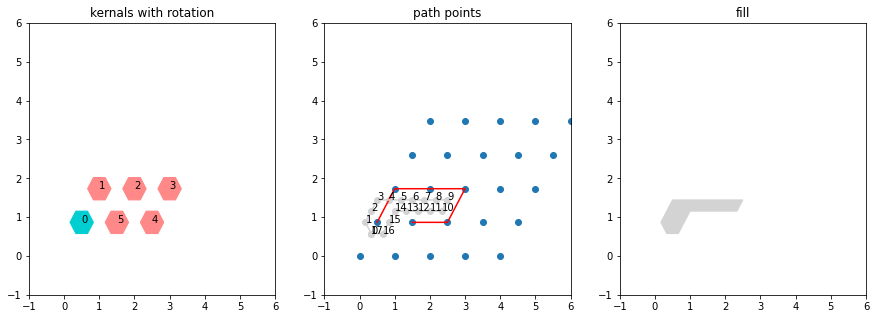

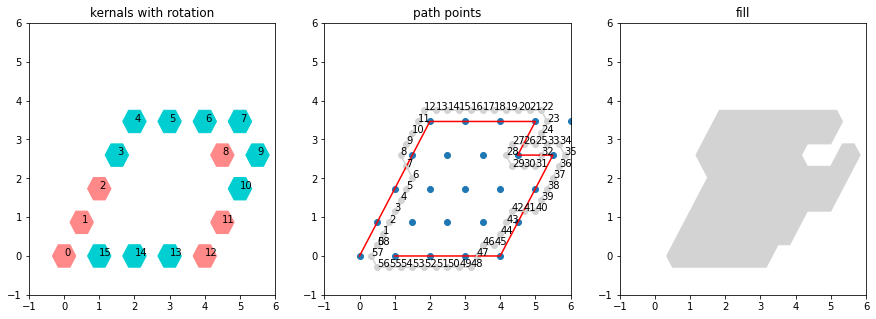

In [9]:
sorted_df =result_df.sort_values(by='solidity')

print('lowest solidity')
lowest_solidity = sorted_df['glyph_objects'].values[0]

render_path_debug(lowest_solidity)

print('highest solidity')

highest_solidity = sorted_df['glyph_objects'].values[-1]

render_path_debug(highest_solidity)


lowest distance
highest distance


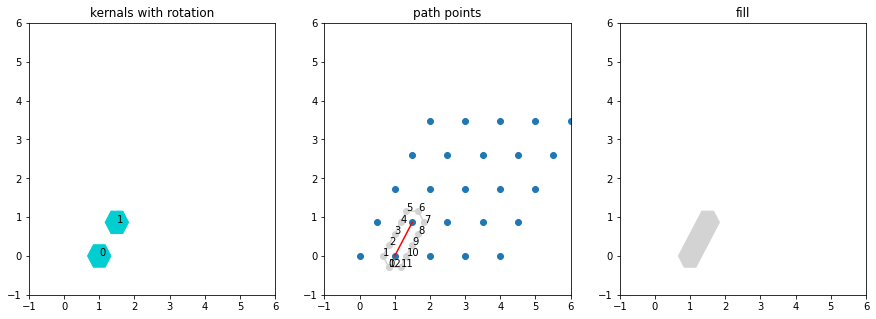

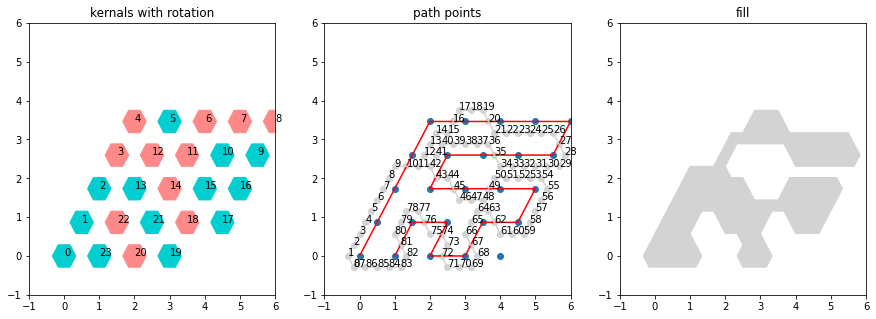

In [10]:
sorted_df =result_df.sort_values(by='distance')

print('lowest distance')
lowest_solidity = sorted_df['glyph_objects'].values[0]

render_path_debug(lowest_solidity)

print('highest distance')

highest_solidity = sorted_df['glyph_objects'].values[-1]

render_path_debug(highest_solidity)

# multiple plots

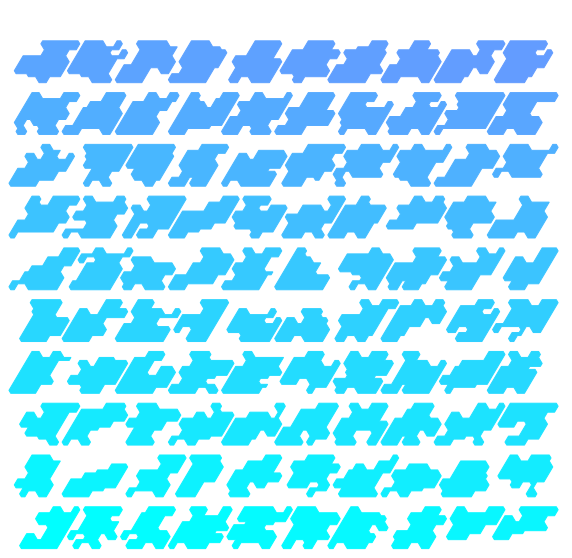

In [13]:
sorted_df =result_df.sort_values(by='concavity')
glyphs = sorted_df.tail(100)['glyph_objects'].values.tolist()

fig= render_multipath_fill(glyphs,save_location ='color_sweep.png',color_profile='cool')

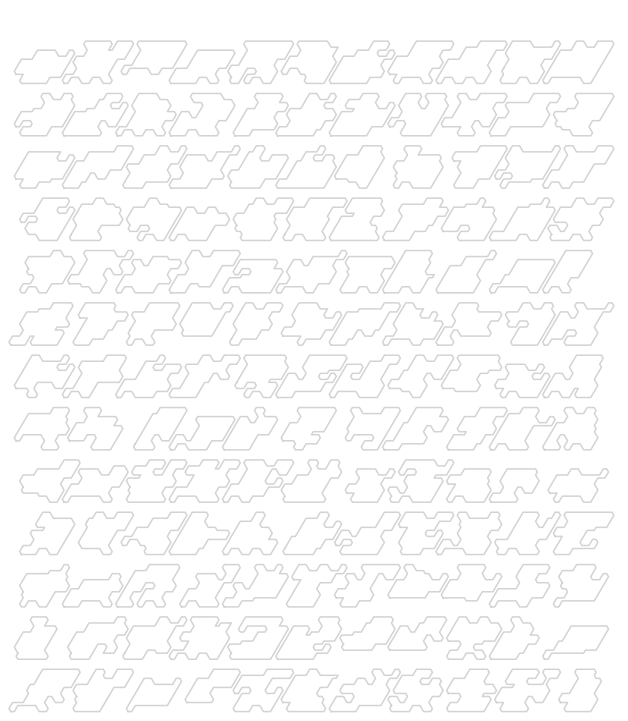

In [62]:
sorted_df =result_df.sort_values(by='concavity')
glyphs = sorted_df.tail(143)['glyph_objects'].values.tolist()
fig =render_multipath_lines(glyphs,save_location =None,width_height_ratio=.85)

In [63]:
fig.savefig('concavity_overlay.svg',bbox_inches='tight',pad_inches=0)

In [64]:
!open concavity_overlay.svg


# Next steps
* assemble glyphs in way that resembles natural language
* create longest possible path with greatest number of convolutions
* remove nubblies 


In [402]:
result_df['glyph_objects'].values.tolist()

In [28]:
from HersheyFonts import HersheyFonts


In [34]:
thefont = HersheyFonts()
thefont.load_font_file('../../chinese_font/danxianziti.svg')


ValueError: invalid literal for int() with base 10: '<?xml'

In [33]:
!ls 

danxianziti.svg
